In [2]:
from thermopack.saftvrqmie import saftvrqmie
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('talk')
sns.set_palette('Dark2')
sns.set_style('ticks')

In [3]:
colors = ["k", "r", "b", "brown", "g", "purple"]

# Testing effect of reference model for He-Ne

In [4]:
# Instanciate and init SAFT-VRQ Mie object (Aasen 2020: https://doi.org/10.1063/1.5136079)
qSAFT = saftvrqmie("He,Ne")
qSAFT.set_tmin(temp=2.0)
# Instanciate and init SAFT-VRQ Mie object with additive reference
qSAFT_ADD = saftvrqmie("He,Ne")
qSAFT_ADD.set_hard_sphere_reference("ADDITIVE",exact_binary_dhs=True, enable_hs_extra=False)
# Instanciate and init SAFT-VRQ Mie object with additive reference, also including non-additivity correction (Leonard 1970: https://doi.org/10/c66c3g)
qSAFT_ADD_EXTRA = saftvrqmie("He,Ne")
qSAFT_ADD_EXTRA.set_hard_sphere_reference("ADDITIVE",exact_binary_dhs=True, enable_hs_extra=True)

In [14]:
Temperatures = [24.71, 26.00, 29.91, 35.90, 38.80, 41.90]

In [22]:
def plot_pxy(isot, **KWARGS):
    # Pxy phase envelope
    p_scaling = 1.0e-6
    LLE, L1VE, L2VE, T = isot
    if LLE[0] is not None:
        plt.plot(LLE[0], LLE[2]*p_scaling, **KWARGS)
        plt.plot(LLE[1], LLE[2]*p_scaling, **KWARGS)
    if L1VE[0] is not None:
        plt.plot(L1VE[0], L1VE[2]*p_scaling, **KWARGS)
        plt.plot(L1VE[1], L1VE[2]*p_scaling, **KWARGS)
    if L2VE[0] is not None:
        plt.plot(L2VE[0], L2VE[2]*p_scaling, **KWARGS)
        plt.plot(L2VE[1], L2VE[2]*p_scaling, **KWARGS)


In [31]:
def plot_prho(eos, isot, **KWARGS):
    # Pxy phase envelope
    p_scaling = 1.0e-6
    rho_scaling = 1.0e-3
    LLE, L1VE, L2VE, T = isot
    if LLE[0] is not None:
        v0 = np.zeros_like(LLE[2])
        v1 = np.zeros_like(LLE[2])
        for i in range(np.shape((LLE[2]))[0]):
            v0[i], = eos.specific_volume(T, LLE[2][i], [LLE[0][i], 1.0-LLE[0][i]], eos.LIQPH)
            v1[i], = eos.specific_volume(T, LLE[2][i], [LLE[1][i], 1.0-LLE[1][i]], eos.LIQPH)
        plt.plot(rho_scaling/v0, LLE[2]*p_scaling, **KWARGS)
        plt.plot(rho_scaling/v1, LLE[2]*p_scaling, **KWARGS)
    if L1VE[0] is not None:
        v0 = np.zeros_like(L1VE[2])
        v1 = np.zeros_like(L1VE[2])
        for i in range(np.shape(L1VE[2])[0]):
            v0[i], = eos.specific_volume(T, L1VE[2][i], [L1VE[0][i], 1.0-L1VE[0][i]], eos.LIQPH)
            v1[i], = eos.specific_volume(T, L1VE[2][i], [L1VE[1][i], 1.0-L1VE[1][i]], eos.VAPPH)
        plt.plot(rho_scaling/v0, L1VE[2]*p_scaling, **KWARGS)
        plt.plot(rho_scaling/v1, L1VE[2]*p_scaling, **KWARGS)
        if LLE[0] is not None:
            KWARGS_MOD = {}
            for key, value in KWARGS.items():
                 KWARGS_MOD[key] = value
            KWARGS_MOD["linestyle"] = ":"
            plt.plot([rho_scaling/v1[0], rho_scaling/v0[0]], [L1VE[2][0]*p_scaling]*2, **KWARGS_MOD)
    if L2VE[0] is not None:
        v0 = np.zeros_like(L2VE[2])
        v1 = np.zeros_like(L2VE[2])
        for i in range(np.shape(L2VE[2])[0]):
            v0[i], = eos.specific_volume(T, L2VE[2][i], [L2VE[0][i], 1.0-L2VE[0][i]], eos.LIQPH)
            v1[i], = eos.specific_volume(T, L2VE[2][i], [L2VE[0][i], 1.0-L2VE[0][i]], eos.VAPPH)
        plt.plot(rho_scaling/v0, L2VE[2]*p_scaling, **KWARGS)
        plt.plot(rho_scaling/v1, L2VE[2]*p_scaling, **KWARGS)

In [16]:
def plot_isotherms_pxy(isot, linestyle="-"):
    for iT, iso in enumerate(isot):
        plot_pxy(iso, color=colors[iT], linestyle=linestyle)

In [25]:
def plot_isotherms_prho(eos, isot, linestyle="-"):
    for iT, iso in enumerate(isot):
        plot_prho(eos, iso, color=colors[iT], linestyle=linestyle)

In [17]:
def get_isotherms(eos):
    isotherms = []
    for T in Temperatures:
        LLE, L1VE, L2VE = eos.get_binary_pxy(T)
        isotherms.append([LLE, L1VE, L2VE, T])
    return isotherms

In [20]:
qSAFT_isot = get_isotherms(eos=qSAFT)
#qSAFT_ADD_isot = get_isotherms(eos=qSAFT_ADD)
qSAFT_ADD_EXTRA_isot = get_isotherms(eos=qSAFT_ADD_EXTRA)

 Reducing minimum pressure to include initial point
 Reducing minimum pressure to include initial point
 Reducing minimum pressure to include initial point
 Reducing minimum pressure to include initial point
 Not able to solve for binary XY point
 Point number on envelope         313
 Number of iterations           40  of maximum           40
 Phase 1:           1
 Phase 2:           2
 Current values:
 Pressure (Pa):   10722558.890602436     
 Temperature (K):   38.799999999999997     
 Phase 1 composition:  0.35052060915833111       0.64947939084166895     
 Phase 2 composition:  0.35181435276196094       0.64818564723803918     
 Did not converge. Terminating in the following divergent state:
 Pressure (Pa):   13920533.778736167     
 Temperature (K):   38.799999999999997     
 Phase 1 composition:  0.35052060915833111       0.64947939084166895     
 Phase 2 composition:  0.35181435276196094       0.64818564723803906     
 Not able to solve for binary XY point
 Point number on envel

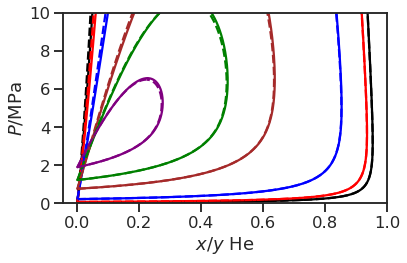

In [27]:
plot_isotherms_pxy(isot=qSAFT_isot, linestyle="-")
#plot_isotherms_pxy(isot=qSAFT_ADD_isot, linestyle=":")
plot_isotherms_pxy(isot=qSAFT_ADD_EXTRA_isot, linestyle="--")
plt.ylim([0,10])
plt.ylabel(r"$P$/MPa")
plt.xlabel(r"$x/y$ He")
plt.tight_layout()
plt.savefig("he_ne_pxy.pdf")
plt.show()

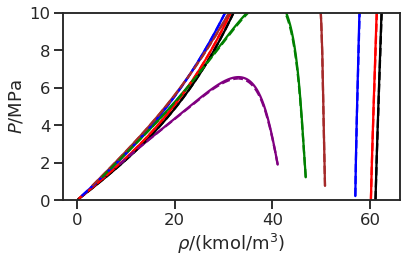

In [32]:
plot_isotherms_prho(eos=qSAFT, isot=qSAFT_isot, linestyle="-")
#plot_isotherms_prho(eos=qSAFT_ADD, isot=qSAFT_ADD_isot, linestyle=":")
plot_isotherms_prho(eos=qSAFT_ADD_EXTRA, isot=qSAFT_ADD_EXTRA_isot, linestyle="--")
plt.ylim([0,10])
plt.ylabel(r"$P$/MPa")
plt.xlabel(r"$\rho$/(kmol/m$^3$)")
plt.tight_layout()
plt.savefig("he_ne_p_rho.pdf")
plt.show()